In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nbformat

In [3]:
# Read the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Display the first few rows of the DataFrame to get an overview of the data
df.head()


uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37

In [4]:
df

uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   review  rating       date  \
0       "It has no side effect, I take it in combinati...       9  20-May-12   
1       "My son is halfway through his fourth week of ...       8  27-Apr-10   
2       "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3       "This is my first time using any form of birth...       8   3-Nov-15   
4       "Suboxone has completely turned my life around...       9  27-Nov-16   
...                                                   ...     ...        ...   
161292  "I wrote my first report in Mid-October of 201...      10  31-May-15   
161293  "I was given this in IV before surgey. I immed...       1   1-Nov-11   
161294  "Limited improvement after 4 months, developed...       2  15-Mar-14   
161295  "I&#039;ve been on thyroid medication 49 years...      10  19-Sep-15   
161296  "I&#039;ve had chronic constipation all my adu...       9  13-Dec-14   

        usefulCount  
0                27  
1               192  
2                17  
3                10  
4                37  
...             ...  
161292          125  
161293           34  
161294           35  
161295           79  
161296          116  

[161297 rows x 7 columns]

In [22]:
# Display summary statistics of numerical columns
summary_stats = df.describe()
print(summary_stats)


            uniqueID         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000


In [23]:
# Check for duplicates
duplicate_rows = df.duplicated().sum()
print("Duplicate Rows:", duplicate_rows)

Duplicate Rows: 0


In [51]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64


In [52]:
# Delete rows with missing values in the 'condition' column
df_cleaned = df.dropna(subset=['condition'])

# Check the shape of the DataFrame after removing missing values
print("Shape of DataFrame after removing missing values in the 'condition' column:", df_cleaned.shape)


Shape of DataFrame after removing missing values in the 'condition' column: (160398, 7)


In [7]:
# Check for data types and summary statistics
data_info = df.info()
print("\nData Information:\n", data_info)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161297 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     161297 non-null  int64 
 1   drugName     161297 non-null  object
 2   condition    160398 non-null  object
 3   review       161297 non-null  object
 4   rating       161297 non-null  int64 
 5   date         161297 non-null  object
 6   usefulCount  161297 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 8.6+ MB

Data Information:
 None


In [8]:
# Check for descriptive statistics
descriptive_stats = df.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)


Descriptive Statistics:
             uniqueID         rating    usefulCount
count  161297.000000  161297.000000  161297.000000
mean   115923.585305       6.994377      28.004755
std     67004.445170       3.272329      36.403742
min         2.000000       1.000000       0.000000
25%     58063.000000       5.000000       6.000000
50%    115744.000000       8.000000      16.000000
75%    173776.000000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000


# Check for Data Integrity:

    Look for any inconsistencies or anomalies in the data.
    Verify if the data types of each column are appropriate.
    Ensure that all data entries are valid and make sense in the context of the dataset.

In [9]:
print("Data Types:")
print(df_cleaned.dtypes)

Data Types:
uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object


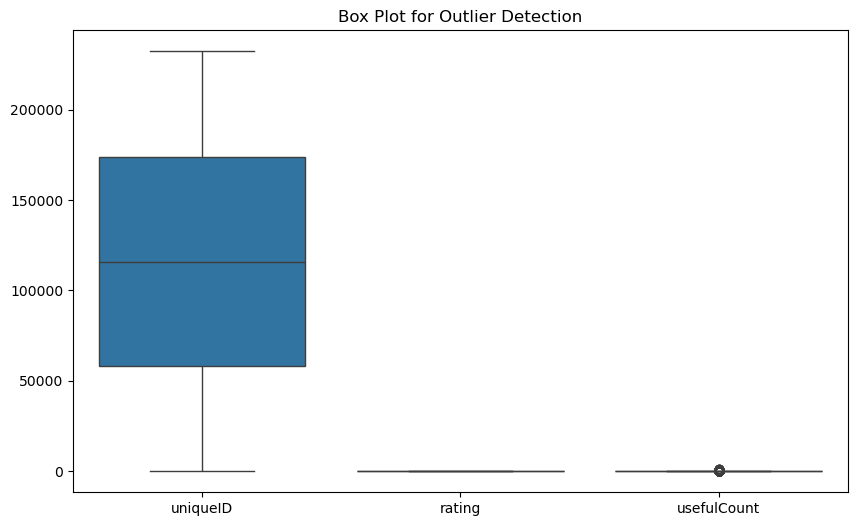

In [30]:
# Visualize distributions and box plots to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [34]:
# Import necessary libraries
from sklearn.ensemble import IsolationForest

# Select numeric columns for anomaly detection
numeric_columns = df.select_dtypes(include=['number'])

# Define and fit the Isolation Forest model
model = IsolationForest()
model.fit(numeric_columns)

# Predict anomalies
anomaly_predictions = model.predict(numeric_columns)

# Display anomaly predictions
print(anomaly_predictions)



[ 1 -1  1 ... -1 -1 -1]


In [40]:
predictions = model.predict(numeric_columns)
anomaly_indices = np.where(predictions == -1)[0]
anomalous_data_points = df.iloc[anomaly_indices]
# Display the anomalous data points
print(anomalous_data_points)


        uniqueID            drugName                     condition  \
1          95260          Guanfacine                          ADHD   
5         155963              Cialis  Benign Prostatic Hyperplasia   
8          74811              Keppra                      Epilepsy   
12        191290             Pentasa               Crohn's Disease   
13        221320    Dextromethorphan                         Cough   
...          ...                 ...                           ...   
161292    191035             Campral            Alcohol Dependence   
161293    127085      Metoclopramide               Nausea/Vomiting   
161294    187382             Orencia          Rheumatoid Arthritis   
161295     47128  Thyroid desiccated           Underactive Thyroid   
161296    215220        Lubiprostone         Constipation, Chronic   

                                                   review  rating       date  \
1       "My son is halfway through his fourth week of ...       8  27-Apr-10   

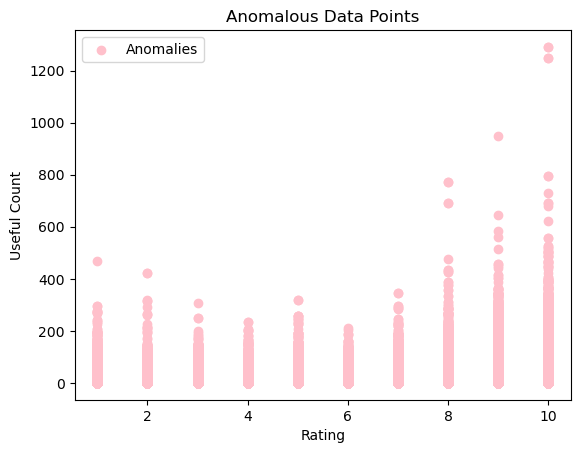

In [43]:
plt.scatter(anomalous_data_points['rating'], anomalous_data_points['usefulCount'], color='pink', label='Anomalies')
plt.xlabel('Rating')
plt.ylabel('Useful Count')
plt.title('Anomalous Data Points')
plt.legend()
plt.show()


In [ ]:

# Predict outliers
outliers = model.predict(df)

# Step 4: Data Quality Metrics
# Establish metrics and KPIs to measure and monitor data quality
# Enable continuous improvement efforts

# Define data quality metrics such as completeness, accuracy, consistency, and timeliness
# Calculate data quality metrics based on defined criteria
completeness = 1 - missing_values.mean()
accuracy = ...  # Define accuracy metric calculation
consistency = ...  # Define consistency metric calculation
timeliness = ...  # Define timeliness metric calculation

# Step 5: Risk Assessment
# Identify potential risks to data integrity, security, and privacy
# Develop risk mitigation strategies and controls

# Identify risks such as data breaches, cyber threats, or compliance violations
# Develop risk mitigation strategies and controls to address identified risks

# Example risk assessment for data breaches
if df.isnull().sum().sum() > threshold:
    print("Risk of data breach due to high number of missing values!")
    # Implement risk mitigation strategies such as improving data collection processes

# By following these steps, you can assess the quality of your data and identify areas for improvement.



# Identify Gaps in Data Analytics:

    Review the data distribution and identify any unusual patterns.
    Evaluate the usefulness of the available features for analysis and decision-making.
    Consider whether additional data or features could enhance the analysis.

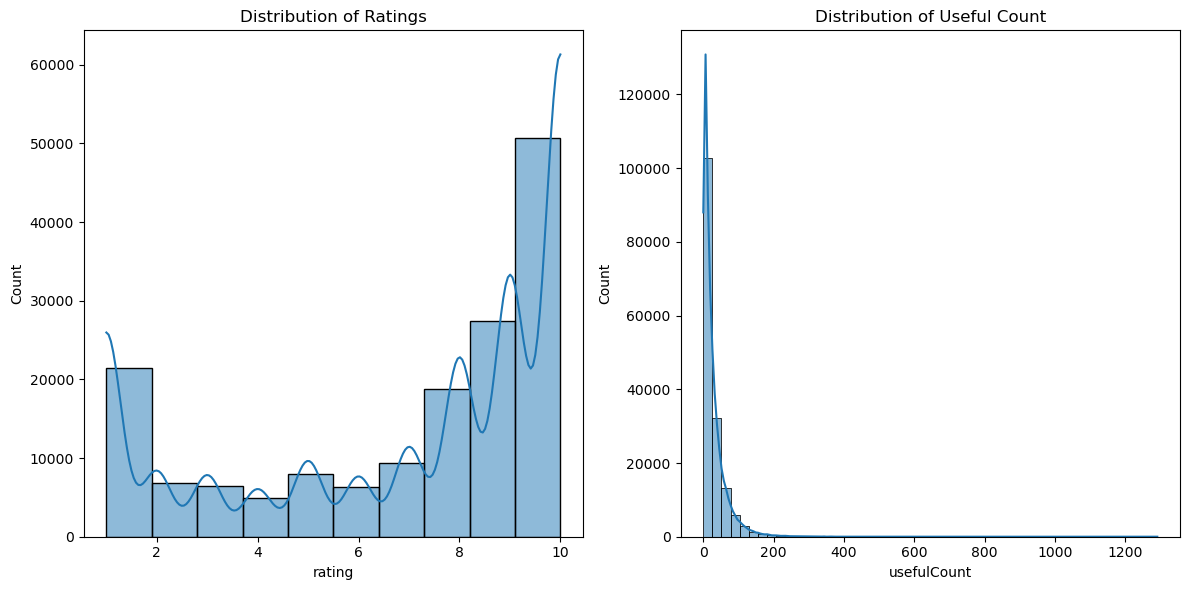

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['usefulCount'], bins=50, kde=True)
plt.title('Distribution of Useful Count')

plt.tight_layout()
plt.show()

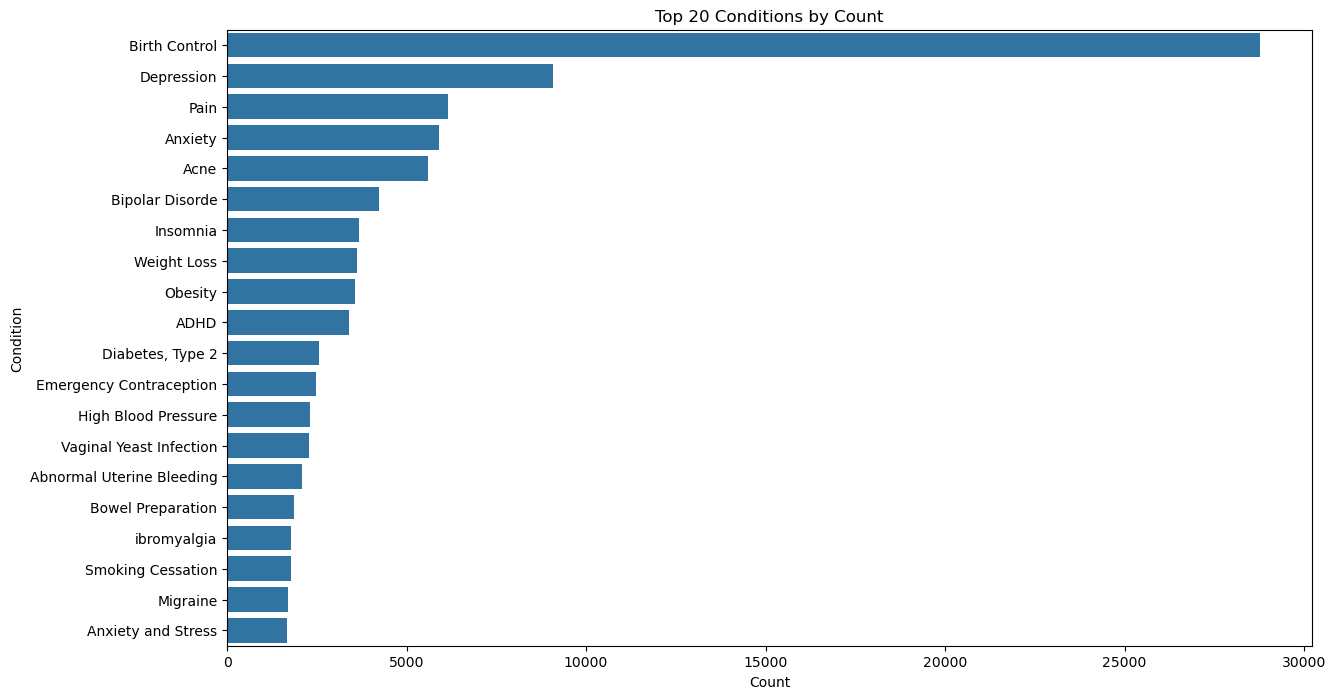

In [11]:
# Task 1: Plot showing the Top 20 Conditions by Count

plt.figure(figsize=(14, 8))
plt.title('Top 20 Conditions by Count')
sns.countplot(data=df, y='condition', order=df['condition'].value_counts().index[:20])
plt.xlabel('Count')
plt.ylabel('Condition')
plt.show()


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [13]:

# Check for data types and summary statistics
data_info = df_cleaned.info()
print("\nData Information:\n", data_info)


<class 'pandas.core.frame.DataFrame'>
Index: 160398 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   uniqueID     160398 non-null  int64 
 1   drugName     160398 non-null  object
 2   condition    160398 non-null  object
 3   review       160398 non-null  object
 4   rating       160398 non-null  int64 
 5   date         160398 non-null  object
 6   usefulCount  160398 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 9.8+ MB

Data Information:
 None


In [14]:

# Check for descriptive statistics
descriptive_stats = df_cleaned.describe()
print("\nDescriptive Statistics:\n", descriptive_stats)



Descriptive Statistics:
             uniqueID         rating    usefulCount
count  160398.000000  160398.000000  160398.000000
mean   115957.147309       6.995923      28.097613
std     67015.899492       3.272303      36.457876
min         2.000000       1.000000       0.000000
25%     58065.250000       5.000000       6.000000
50%    115845.500000       8.000000      16.000000
75%    173826.750000      10.000000      36.000000
max    232291.000000      10.000000    1291.000000


In [15]:

# Hypothesis testing: Compare ratings of different drugs
# Example: Compare ratings of Levonorgestrel and Etonogestrel
levonorgestrel_ratings = df_cleaned[df_cleaned['drugName'] == 'Levonorgestrel']['rating']
etonogestrel_ratings = df_cleaned[df_cleaned['drugName'] == 'Etonogestrel']['rating']


In [16]:

# Perform t-test
t_stat, p_value = ttest_ind(levonorgestrel_ratings, etonogestrel_ratings)
print("\nHypothesis Testing Results:")
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

if p_value < 0.05:
    print("The difference in ratings between Levonorgestrel and Etonogestrel is statistically significant.")
else:
    print("There is no statistically significant difference in ratings between Levonorgestrel and Etonogestrel.")




Hypothesis Testing Results:
T-Statistic: 20.689647449791543
P-Value: 2.4885341119723292e-92
The difference in ratings between Levonorgestrel and Etonogestrel is statistically significant.


In [17]:
# Correlation Analysis: Correlation between drug ratings and conditions
import pandas as pd

# Read the dataset into a pandas DataFrame
df = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Delete rows with missing values in the 'condition' column
df_cleaned = df.dropna(subset=['condition'])

# Convert condition labels to numeric values for correlation analysis
df_cleaned['condition_code'] = df_cleaned['condition'].astype('category').cat.codes

# Calculate the correlation between drug ratings and condition codes
rating_condition_corr = df_cleaned['rating'].corr(df_cleaned['condition_code'])

print("\nCorrelation between Drug Ratings and Condition Codes:", rating_condition_corr)



Correlation between Drug Ratings and Condition Codes: 0.05103031419545069


C:\Users\Pc\AppData\Local\Temp\ipykernel_6644\2155851637.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['condition_code'] = df_cleaned['condition'].astype('category').cat.codes


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report


In [19]:
import nbformat

# Load your notebook
with open(r'C:\Users\Pc\Desktop\Arden\6-Data Handling and Decision Making\Data Handling and Decision Making.ipynb', 'r', encoding='utf-8') as notebook_file:
    notebook_content = notebook_file.read()

# Parse the notebook content
notebook = nbformat.reads(notebook_content, as_version=4)

# Apply any normalization or cleanup steps here

# Save the normalized notebook
with open('normalized_notebook.ipynb', 'w', encoding='utf-8') as output_file:
    nbformat.write(notebook, output_file)


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned['review'], df_cleaned['rating'], test_size=0.2, random_state=42)


In [21]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)


In [44]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check data types
data_types = df.dtypes
print("\nData Types:\n", data_types)

# Check for duplicates
duplicate_rows = df.duplicated().sum()
print("\nDuplicate Rows:", duplicate_rows)

# Check for outliers or anomalies
# This can include visual inspection or statistical methods


Missing Values:
 uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

Data Types:
 uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

Duplicate Rows: 0


In [45]:
# Check unique values and counts for each dimension
unique_conditions = df['condition'].nunique()
unique_drugs = df['drugName'].nunique()
unique_dates = df['date'].nunique()
print("Unique Conditions:", unique_conditions)
print("Unique Drugs:", unique_drugs)
print("Unique Dates:", unique_dates)


Unique Conditions: 884
Unique Drugs: 3436
Unique Dates: 3579


In [46]:
# Review the first few rows of the DataFrame
print(df.head())

# Check for missing values in the date column
missing_dates = df['date'].isnull().sum()
print("Missing dates:", missing_dates)

# Check the range of dates covered by the dataset
min_date = df['date'].min()
max_date = df['date'].max()
print("Min date:", min_date)
print("Max date:", max_date)

# Check for duplicates in the date column
duplicate_dates = df.duplicated(subset=['date']).sum()
print("Duplicate dates:", duplicate_dates)

# Assess the data quality and consistency of date formatting
date_format_consistency = df['date'].apply(lambda x: pd.to_datetime(x, errors='coerce').strftime('%Y-%m-%d') if pd.notnull(x) else x)
inconsistent_dates = (df['date'] != date_format_consistency).sum()
print("Inconsistent date formatting:", inconsistent_dates)

   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  
Missing dates: 0
Min

In [50]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Sample drug reviews data
reviews = ["This drug worked wonders for my headaches.",
           "I experienced some side effects after taking this medication.",
           "The medication helped alleviate my symptoms.",
           "I did not notice any improvement with this drug.",
           "This medication made me feel nauseous."]

# Preprocess the reviews
stop_words = set(stopwords.words('english'))
reviews_processed = []
for review in reviews:
    # Tokenize words
    tokens = word_tokenize(review.lower())
    # Remove punctuation and stopwords
    tokens = [token for token in tokens if token not in stop_words and token not in string.punctuation]
    reviews_processed.append(tokens)

# Create dictionary and corpus
dictionary = Dictionary(reviews_processed)
corpus = [dictionary.doc2bow(review) for review in reviews_processed]

# Build LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Print topics
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}:\n{topic}\n")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Topic 0:
0.138*"medication" + 0.137*"feel" + 0.137*"made" + 0.137*"nauseous" + 0.035*"improvement" + 0.035*"notice" + 0.035*"drug" + 0.035*"headaches" + 0.035*"wonders" + 0.035*"worked"

Topic 1:
0.132*"drug" + 0.075*"side" + 0.075*"effects" + 0.075*"taking" + 0.075*"experienced" + 0.075*"worked" + 0.075*"wonders" + 0.075*"headaches" + 0.075*"improvement" + 0.075*"notice"

Topic 2:
0.139*"medication" + 0.137*"alleviate" + 0.137*"helped" + 0.137*"symptoms" + 0.035*"notice" + 0.035*"drug" + 0.035*"improvement" + 0.035*"headaches" + 0.035*"worked" + 0.035*"wonders"



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [56]:
print(data.columns)


Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
data = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Preprocessing - Encoding categorical variables
label_encoder = LabelEncoder()
data['condition_code'] = label_encoder.fit_transform(data['condition'])

# Now you can proceed with using these columns as predictor variables
# Splitting the data into training and testing sets
X = data[['usefulCount', 'condition_code']]  # Add other predictor variables as needed
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


KeyError: 'Label'

In [59]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Load the dataset
data = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Preprocessing - Encoding categorical variables
label_encoder = LabelEncoder()
data['condition_code'] = label_encoder.fit_transform(data['condition'])

# Now you can proceed with using these columns as predictor variables
# Splitting the data into training and testing sets
X = data[['usefulCount', 'condition_code']]  # Add other predictor variables as needed
y = data['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)



Mean Squared Error: 10.078115238026895
Coefficients: [0.02101109 0.0003894 ]
Intercept: 6.265286411950594


# Apply statistical tools and report initial outcomes:

In [67]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 
# Checking the first few rows of the dataframe
print(data.head())

   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  condition_code  
0           27             466  
1          192              73  
2           17         

count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64


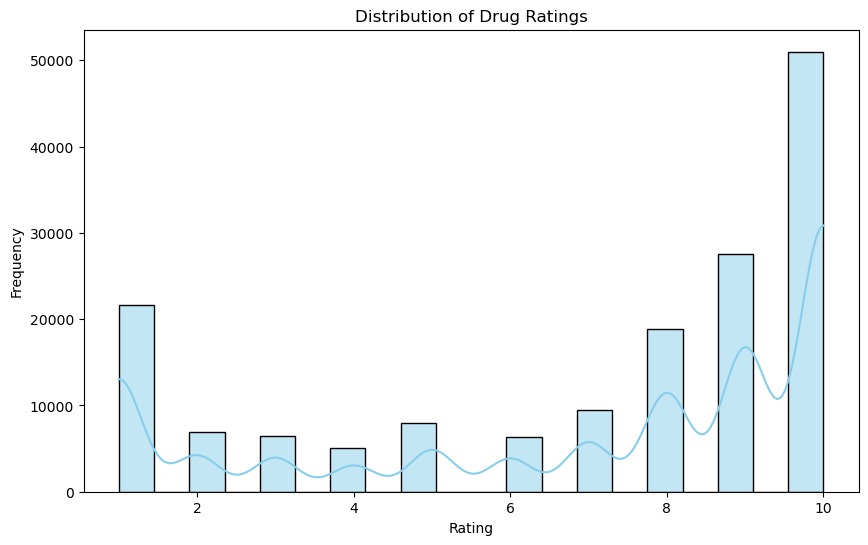

In [63]:
# Task 2: Descriptive Statistics
# 

descriptive_stats = data['rating'].describe()
print(descriptive_stats)

# Visualizing the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [64]:
# Task 3: Comparison of Drug Ratings
# Comparing ratings of different drugs
average_ratings = data.groupby('drugName')['rating'].mean()
highest_rated_drug = average_ratings.idxmax()
lowest_rated_drug = average_ratings.idxmin()
print("Highest Rated Drug:", highest_rated_drug)
print("Lowest Rated Drug:", lowest_rated_drug)

# Conducting statistical tests
# Example: t-test comparing ratings of two different drugs
drug1_ratings = data[data['drugName'] == 'Drug1']['rating']
drug2_ratings = data[data['drugName'] == 'Drug2']['rating']
t_statistic, p_value = stats.ttest_ind(drug1_ratings, drug2_ratings)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)



Highest Rated Drug: A + D Cracked Skin Relief
Lowest Rated Drug: Acarbose
T-Statistic: nan
P-Value: nan


In [76]:
# Task 4: Reporting Initial Outcomes
# Reporting descriptive statistics
print("\nDescriptive Statistics of Drug Ratings:\n", descriptive_stats)

# Summarizing significant differences in ratings
print("\nSignificant Differences in Ratings:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)



Descriptive Statistics of Drug Ratings:
 count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

Significant Differences in Ratings:
T-Statistic: nan
P-Value: nan


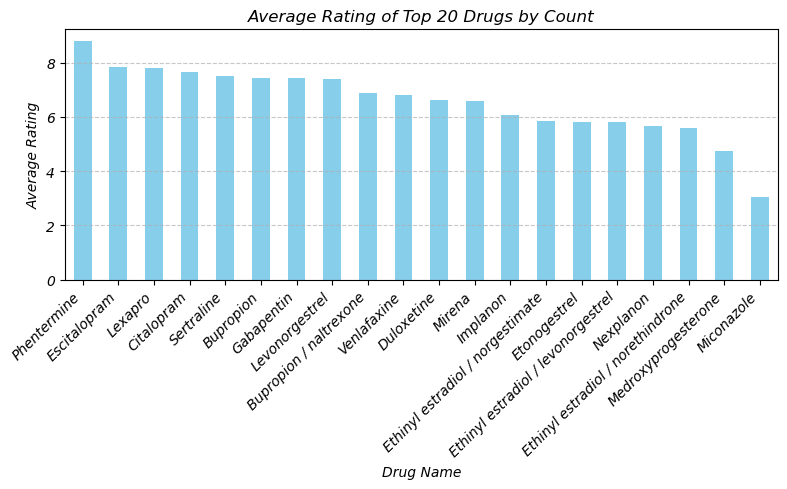

In [80]:
# Calculate the average rating for each drug
average_ratings = top_20_data.groupby('drugName')['rating'].mean().sort_values(ascending=False)

# Visualize the average ratings for the top 20 drugs using a bar plot
plt.figure(figsize=(8, 5))
average_ratings.plot(kind='bar', color='skyblue')
plt.title('Average Rating of Top 20 Drugs by Count', fontstyle='italic')  # Italicize the title
plt.xlabel('Drug Name', fontstyle='italic')  # Italicize the x-axis label
plt.ylabel('Average Rating', fontstyle='italic')  # Italicize the y-axis label
plt.xticks(rotation=45, ha='right', fontstyle='italic')  # Rotate x-axis labels by 45 degrees and align them to the right
plt.yticks(fontstyle='italic')  # Italicize the y-axis tick labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  condition_code  
0           27             466  
1          192              73  
2           17         

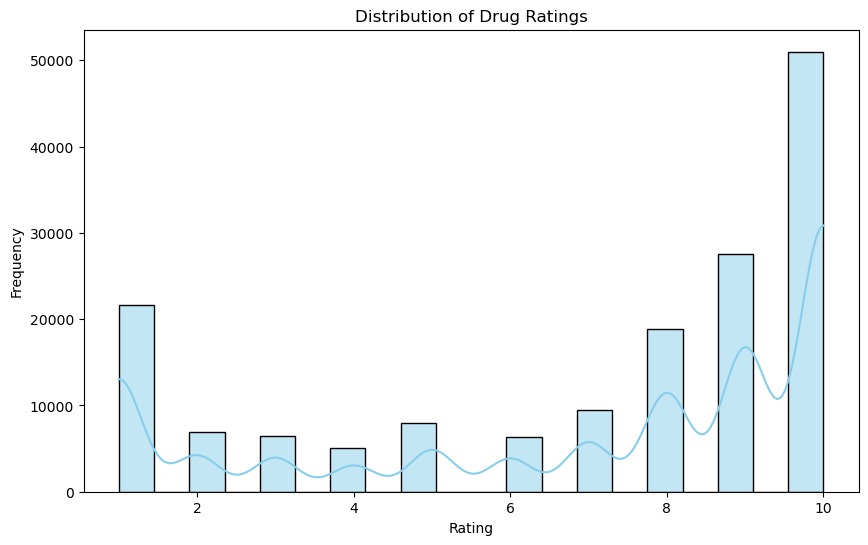

Highest Rated Drug: A + D Cracked Skin Relief
Lowest Rated Drug: Acarbose
T-Statistic: nan
P-Value: nan

Descriptive Statistics of Drug Ratings:
 count    161297.000000
mean          6.994377
std           3.272329
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

Significant Differences in Ratings:
T-Statistic: nan
P-Value: nan


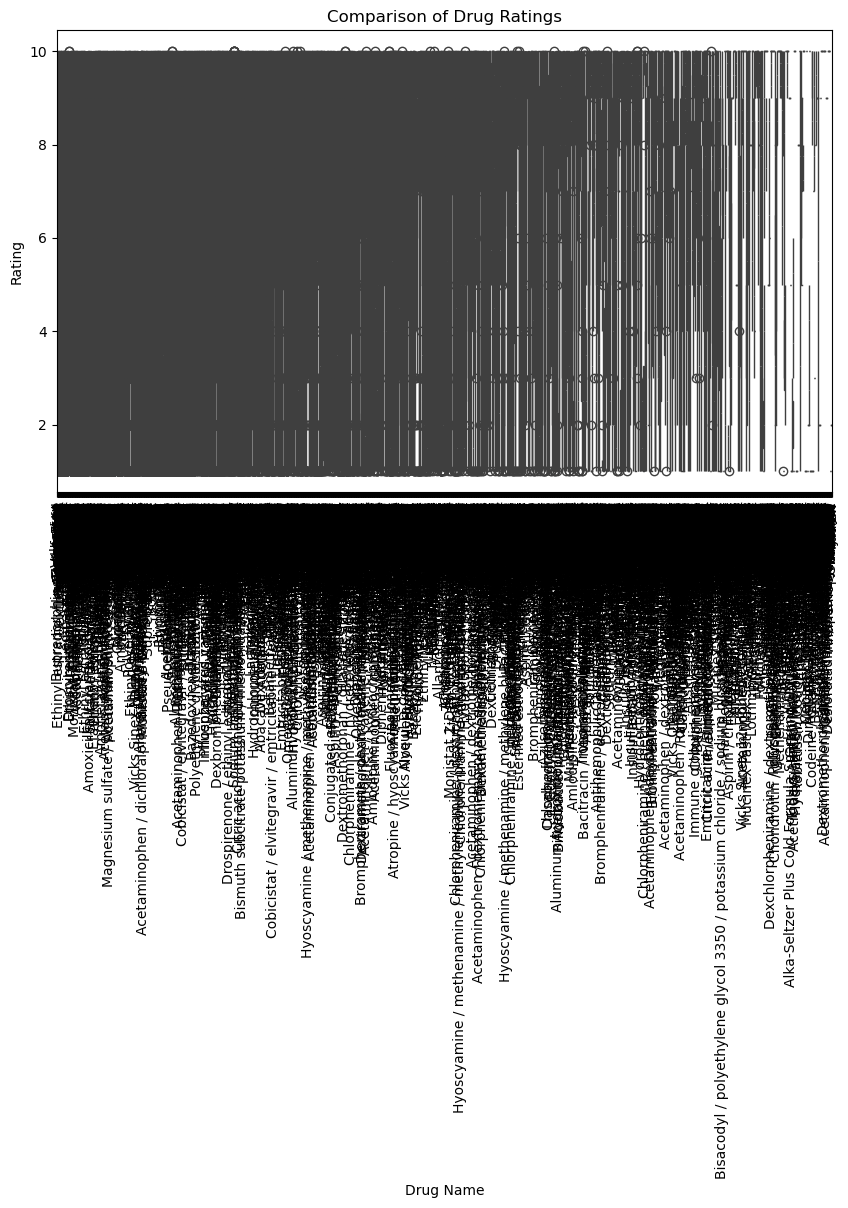

In [82]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats  # Added this line

# Checking the first few rows of the dataframe
print(data.head())

# Checking for any missing values
print(data.isnull().sum())

# Task 2: Descriptive Statistics
# Calculating basic descriptive statistics
descriptive_stats = data['rating'].describe()
print(descriptive_stats)

# Visualizing the distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Drug Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Task 3: Comparison of Drug Ratings
# Comparing ratings of different drugs
average_ratings = data.groupby('drugName')['rating'].mean()
highest_rated_drug = average_ratings.idxmax()
lowest_rated_drug = average_ratings.idxmin()
print("Highest Rated Drug:", highest_rated_drug)
print("Lowest Rated Drug:", lowest_rated_drug)

# Conducting statistical tests
# Example: t-test comparing ratings of two different drugs
drug1_ratings = data[data['drugName'] == 'Drug1']['rating']
drug2_ratings = data[data['drugName'] == 'Drug2']['rating']
t_statistic, p_value = stats.ttest_ind(drug1_ratings, drug2_ratings)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Task 4: Reporting Initial Outcomes
# Reporting descriptive statistics
print("\nDescriptive Statistics of Drug Ratings:\n", descriptive_stats)

# Summarizing significant differences in ratings
print("\nSignificant Differences in Ratings:")
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Visualizing differences between drugs
plt.figure(figsize=(10, 6))
sns.boxplot(x='drugName', y='rating', data=data)
plt.title('Comparison of Drug Ratings')
plt.xlabel('Drug Name')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


C:\Users\Pc\AppData\Local\Temp\ipykernel_6644\1476389957.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


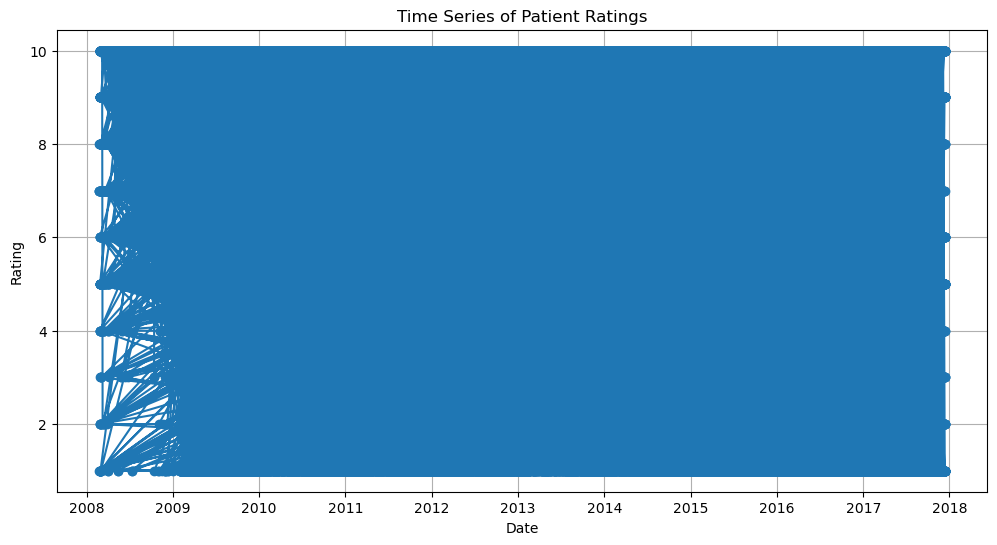

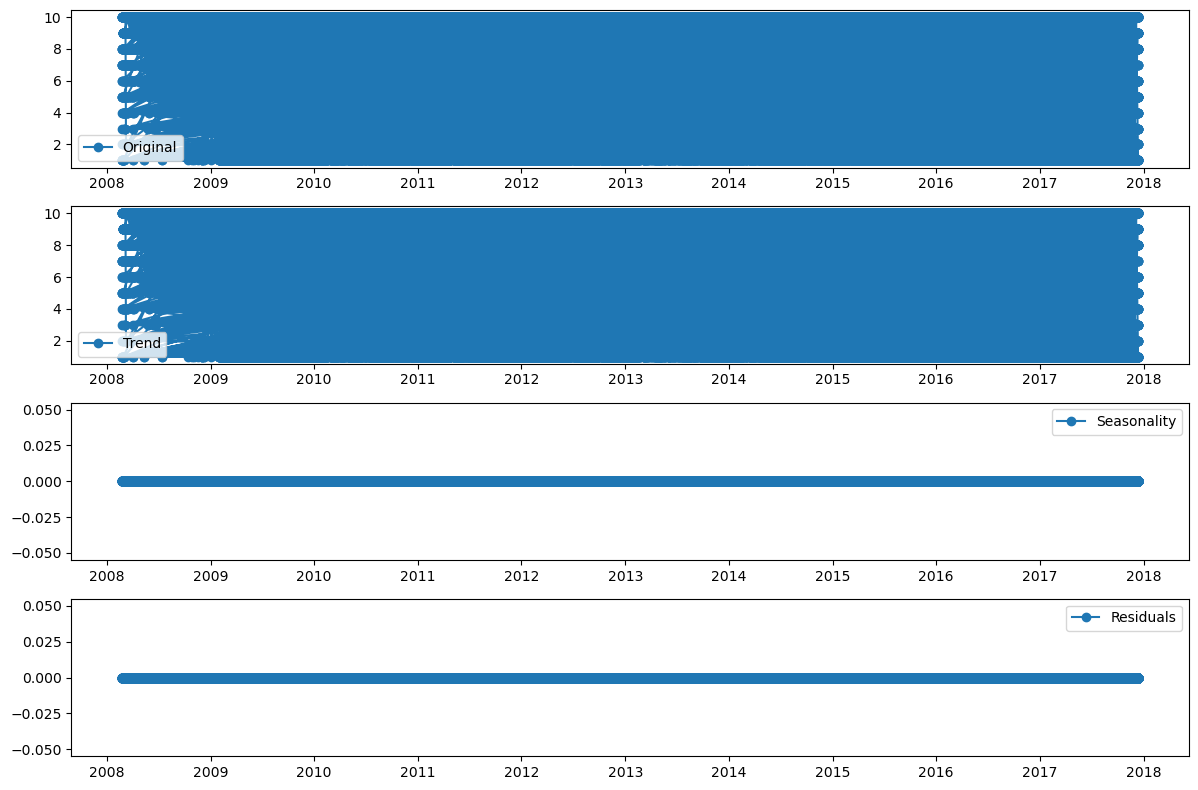

C:\Users\Pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\Pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pc\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Pc\anaconda3\Lib\site-packages\statsm

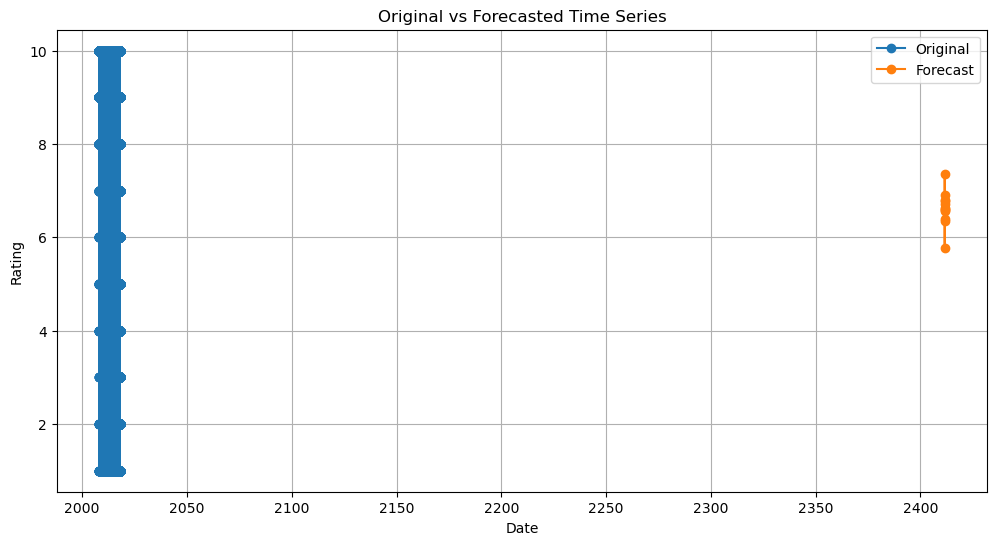

ValueError: Found input variables with inconsistent numbers of samples: [161297, 12]

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming you have a DataFrame named 'data' containing the relevant columns
# 'date' and 'rating' representing the date of review entry and the corresponding rating

# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Set 'date' column as the index
data.set_index('date', inplace=True)

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['rating'], marker='o', linestyle='-')
plt.title('Time Series of Patient Ratings')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

# Decompose the time series to identify trends, seasonality, and noise
decomposition = seasonal_decompose(data['rating'], model='additive', period=1)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Visualize the decomposed components
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['rating'], label='Original', marker='o', linestyle='-')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', marker='o', linestyle='-')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', marker='o', linestyle='-')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', marker='o', linestyle='-')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Simple Exponential Smoothing for smoothing the time series
model = SimpleExpSmoothing(data['rating'])
fit = model.fit(smoothing_level=0.6, optimized=False)
smoothed = fit.fittedvalues

# Visualize the original and smoothed time series
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['rating'], label='Original', marker='o', linestyle='-')
plt.plot(smoothed.index, smoothed, label='Smoothed', marker='o', linestyle='-')
plt.title('Original vs Smoothed Time Series')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# ARIMA model for forecasting
model_arima = ARIMA(data['rating'], order=(5,1,0))
fit_arima = model_arima.fit()
forecast = fit_arima.forecast(steps=12)

# Visualize the original time series and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['rating'], label='Original', marker='o', linestyle='-')
plt.plot(forecast.index, forecast, label='Forecast', marker='o', linestyle='-')
plt.title('Original vs Forecasted Time Series')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Evaluate the forecast using Mean Squared Error
mse = mean_squared_error(data['rating'], forecast)
print("Mean Squared Error:", mse)


C:\Users\Pc\AppData\Local\Temp\ipykernel_6644\3562766527.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


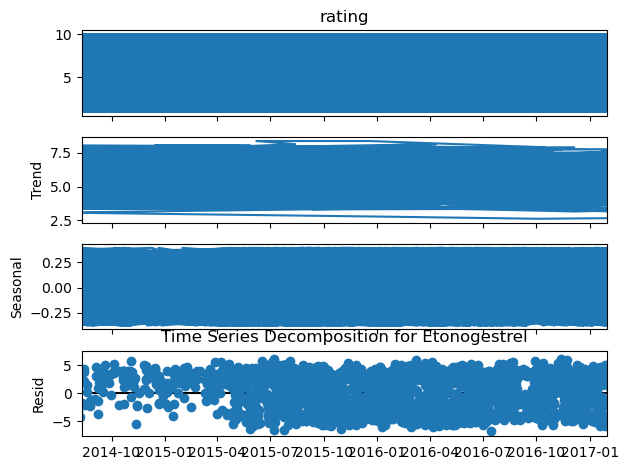

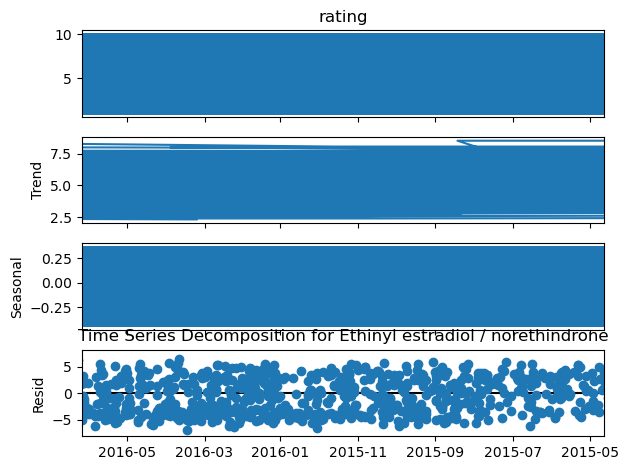

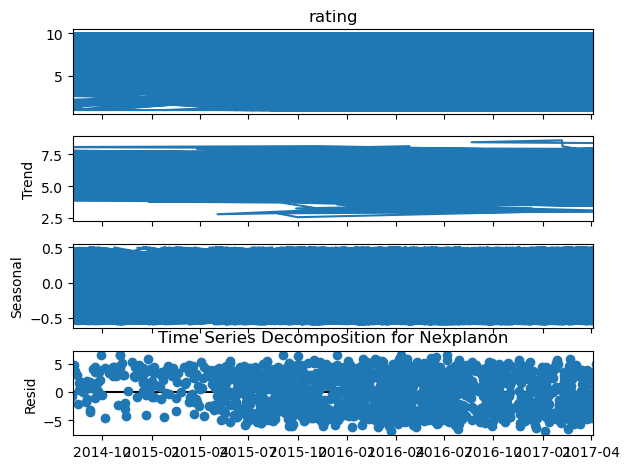

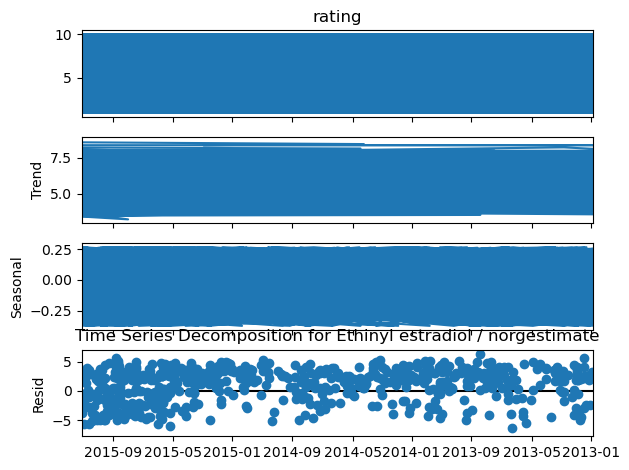

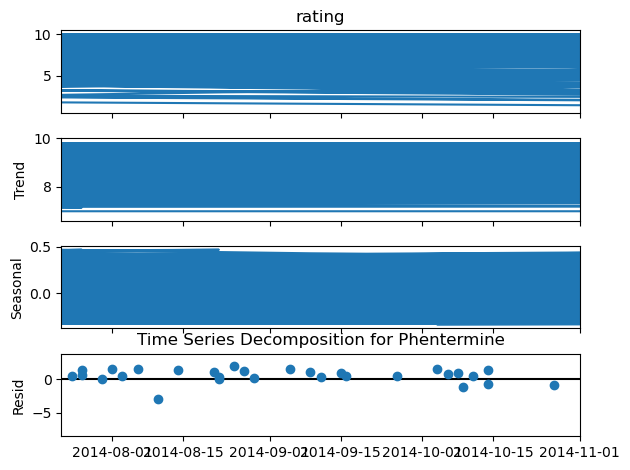

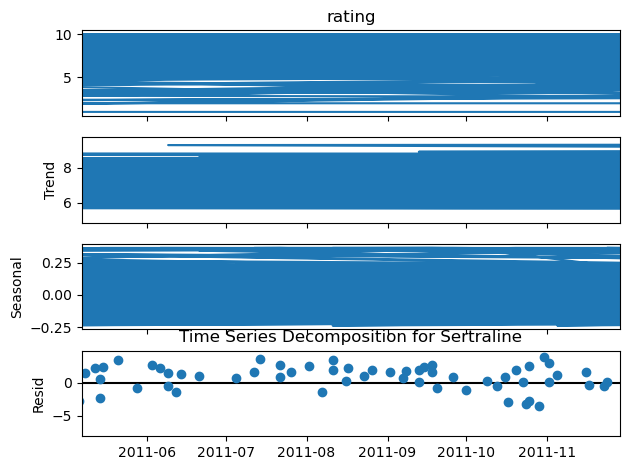

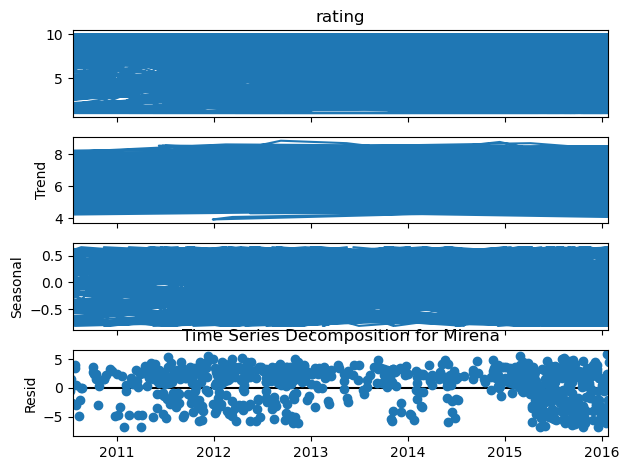

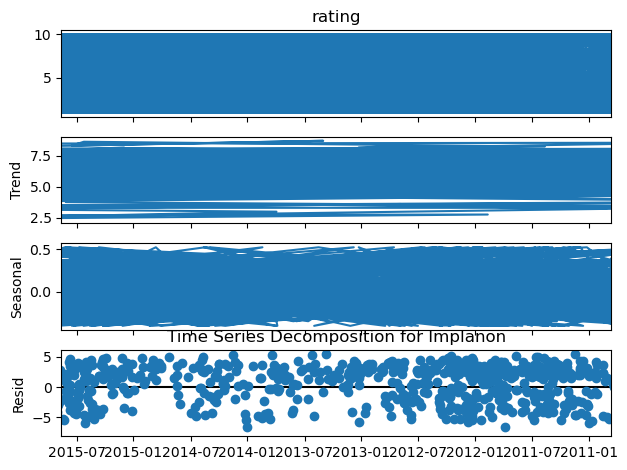

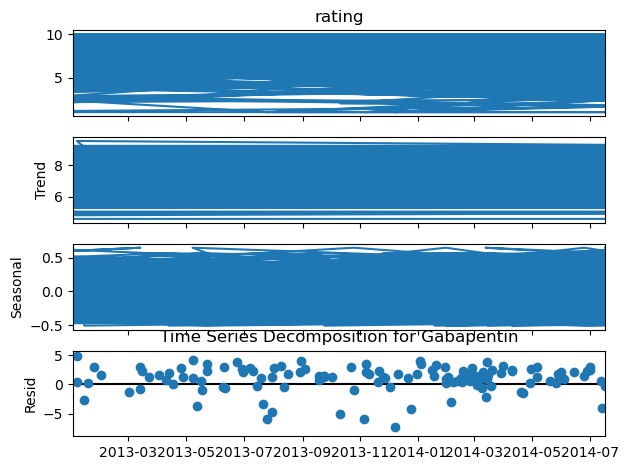

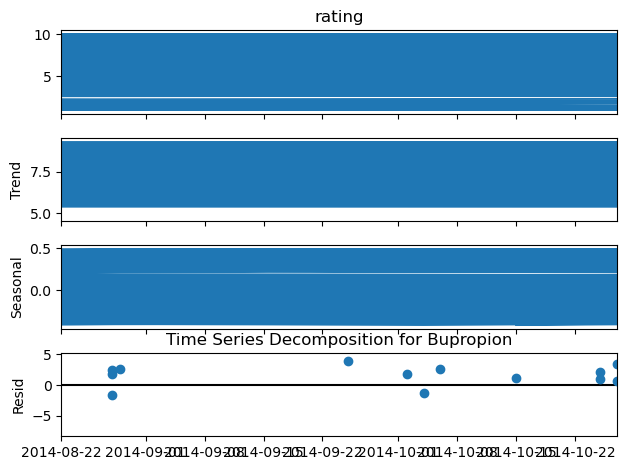

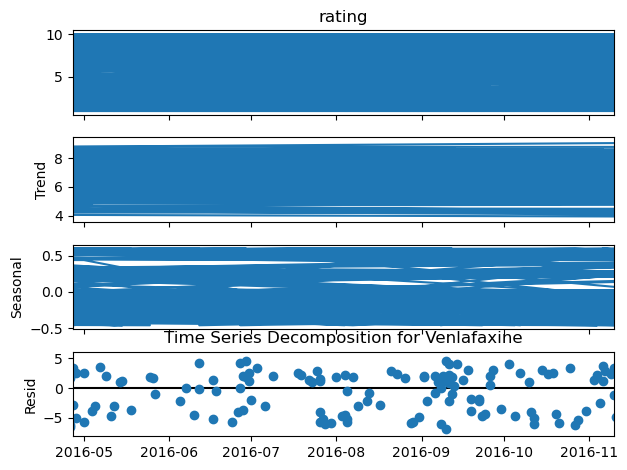

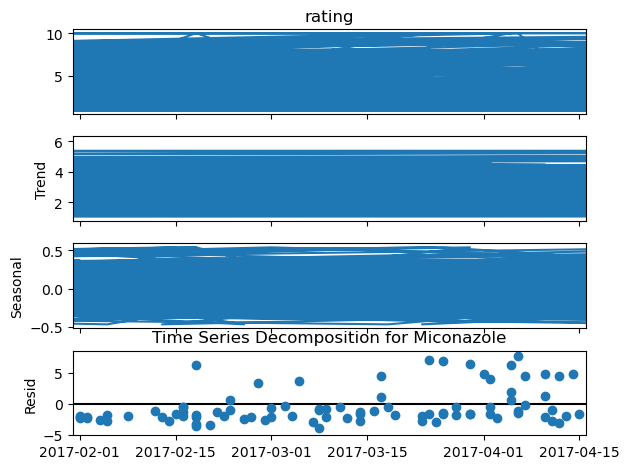

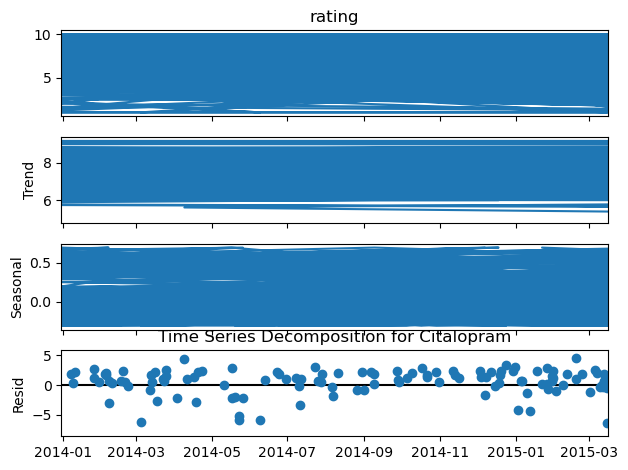

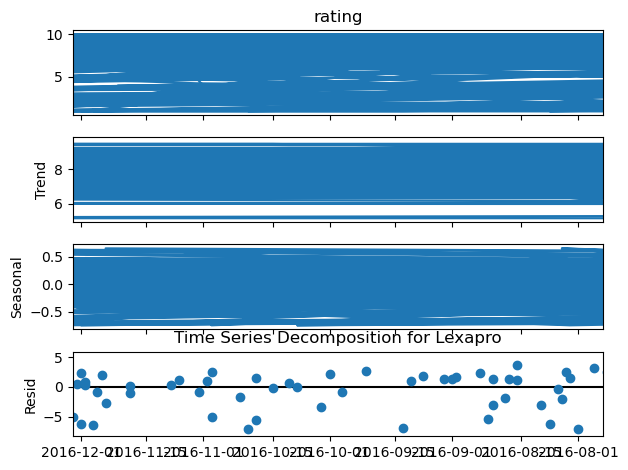

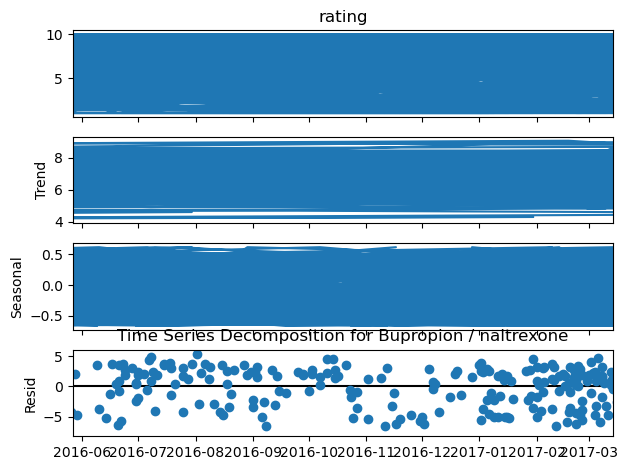

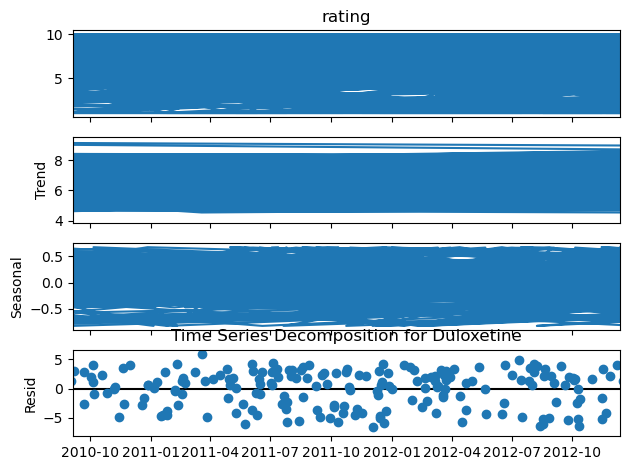

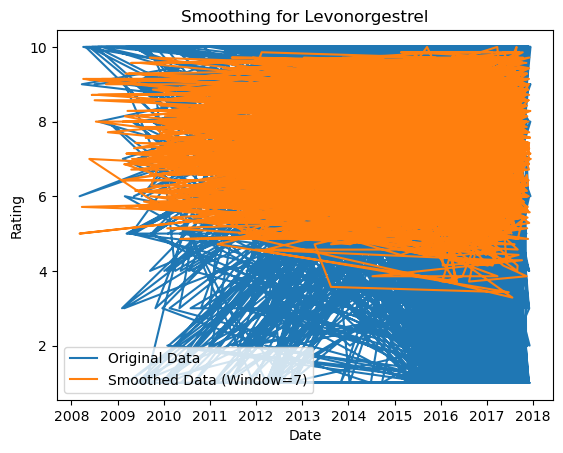

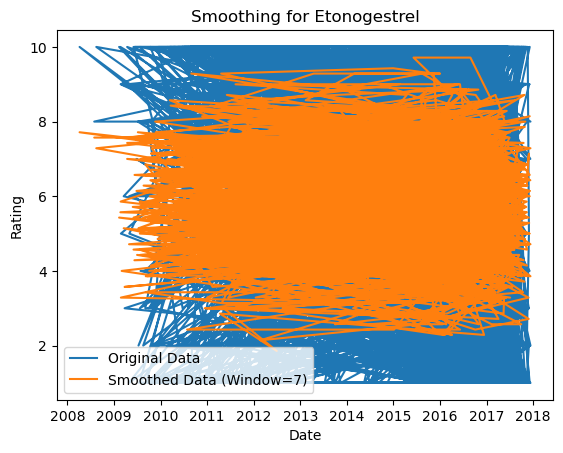

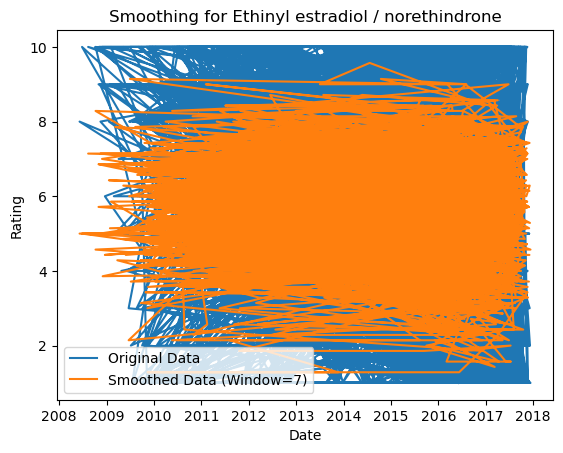

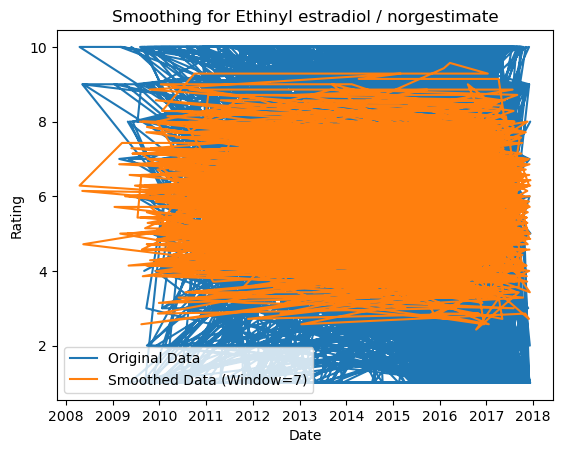

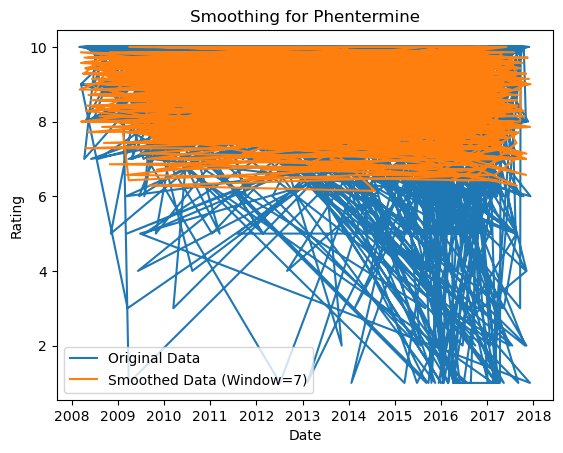

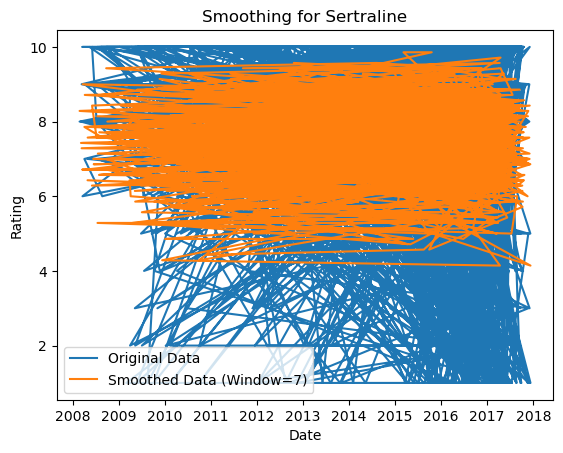

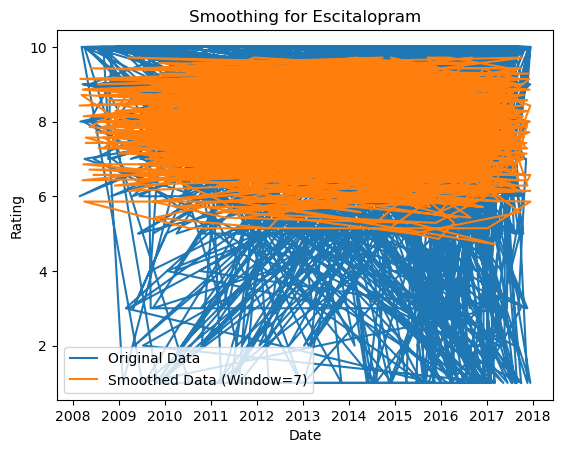

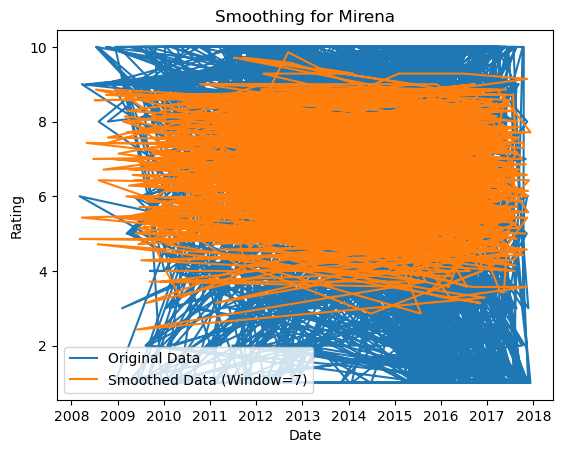

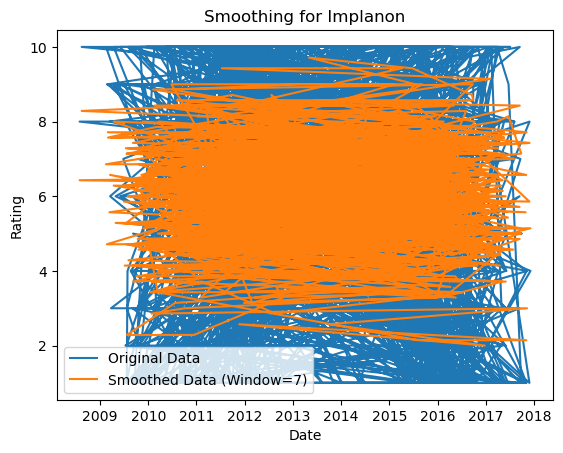

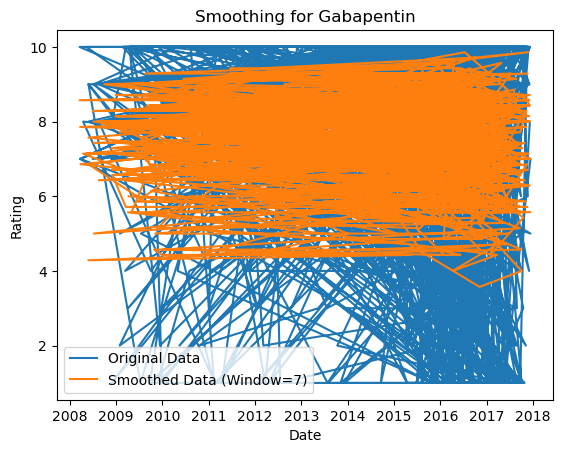

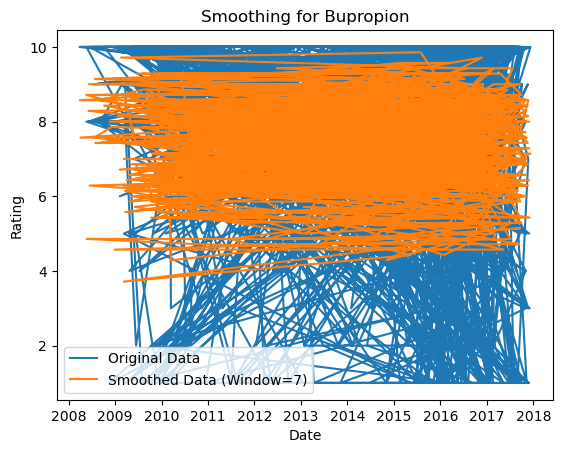

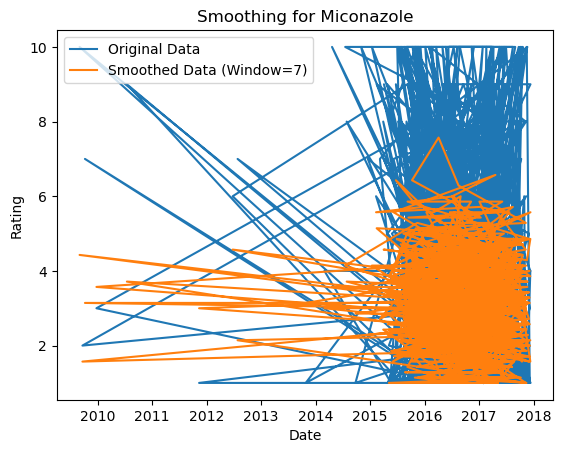

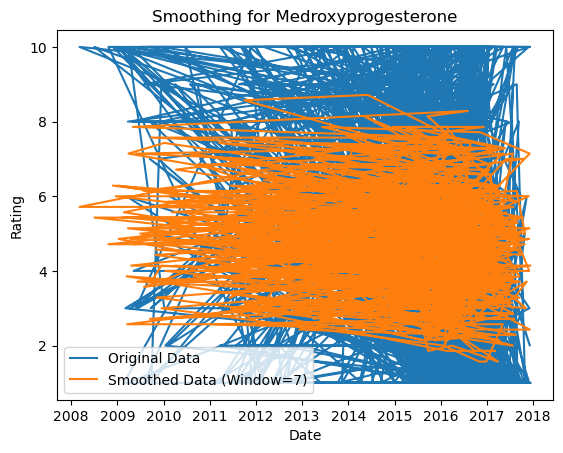

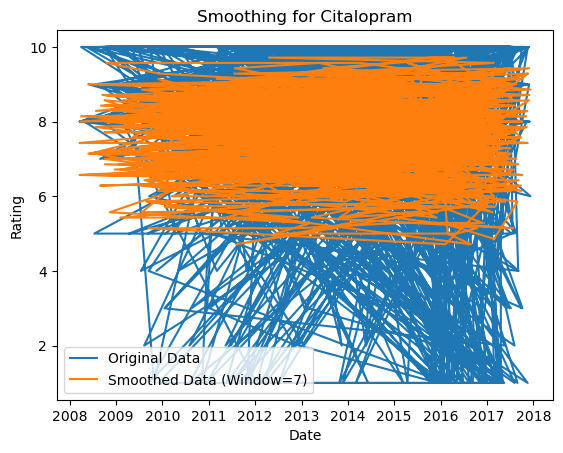

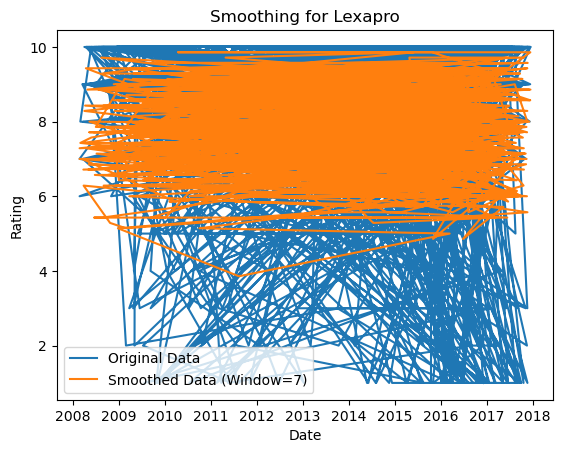

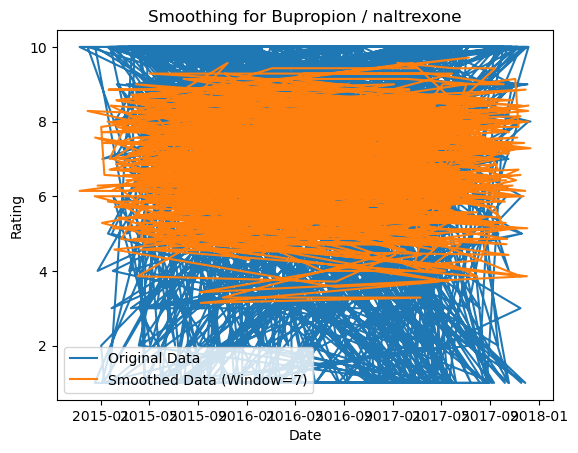

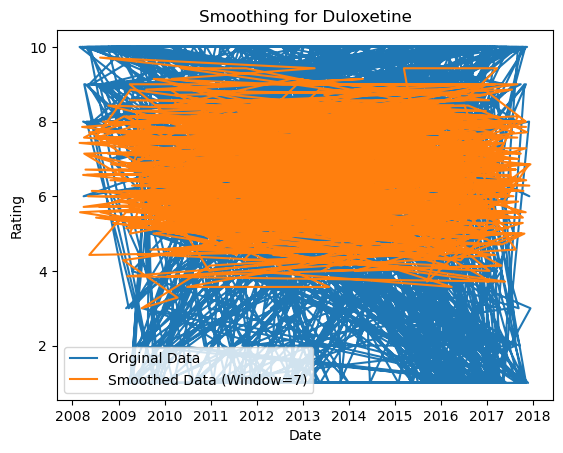

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL

data = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Assuming your dataset has columns 'date' and 'rating'
# Convert 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Assuming 'date' column is the index of your DataFrame
data.set_index('date', inplace=True)

# Select the top 20 drugs by count
top_20_drugs = data['drugName'].value_counts().head(20).index

# Filter the data for the top 20 drugs
data_top_20 = data[data['drugName'].isin(top_20_drugs)]

from statsmodels.tsa.seasonal import seasonal_decompose

# Time Series Decomposition
for drug in top_20_drugs:
    drug_data = data_top_20[data_top_20['drugName'] == drug]['rating']
    decomposition = seasonal_decompose(drug_data, model='additive', period=13)  # Adjust the period as needed
    decomposition.plot()
    plt.title(f'Time Series Decomposition for {drug}')
    plt.show()

# Smoothing (Moving Average)
window = 7  # Choose the window size for moving average
for drug in top_20_drugs:
    drug_data = data_top_20[data_top_20['drugName'] == drug]['rating']
    smoothed_data = drug_data.rolling(window=window).mean()
    plt.plot(drug_data.index, drug_data, label='Original Data')
    plt.plot(smoothed_data.index, smoothed_data, label=f'Smoothed Data (Window={window})')
    plt.title(f'Smoothing for {drug}')
    plt.xlabel('Date')
    plt.ylabel('Rating')
    plt.legend()
    plt.show()

# Forecasting (ARIMA)
# Example code for forecasting with ARIMA can be added here

# Additional visualizations and forecasting can be added as needed


In [87]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd

# Time Series Analysis
results = []

for drug in top_20_drugs:
    drug_data = data_top_20[data_top_20['drugName'] == drug]['rating']
    decomposition = seasonal_decompose(drug_data, model='additive', period=13)  # Adjust the period as needed
    
    # Calculate trend, seasonal, and residual components
    trend_mean = decomposition.trend.mean()
    seasonal_mean = decomposition.seasonal.mean()
    residual_mean = decomposition.resid.mean()
    
    # Append results to the list
    results.append({
        'Drug': drug,
        'Trend Mean': trend_mean,
        'Seasonal Mean': seasonal_mean,
        'Residual Mean': residual_mean
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Time Series Analysis Results:")
print(results_df)


Time Series Analysis Results:
                                  Drug  Trend Mean  Seasonal Mean  \
0                       Levonorgestrel    7.394450       0.000015   
1                         Etonogestrel    5.800680      -0.000013   
2    Ethinyl estradiol / norethindrone    5.594975      -0.000054   
3                            Nexplanon    5.677562       0.000097   
4     Ethinyl estradiol / norgestimate    5.857775      -0.000053   
5   Ethinyl estradiol / levonorgestrel    5.795883       0.000295   
6                          Phentermine    8.778878      -0.000012   
7                           Sertraline    7.497832       0.000122   
8                         Escitalopram    7.847656       0.000595   
9                               Mirena    6.581301       0.001063   
10                            Implanon    6.092449       0.000281   
11                          Gabapentin    7.431661      -0.000074   
12                           Bupropion    7.437471      -0.001442   
13  

In [88]:
import pandas as pd
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Load data
data = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

reviews = data['review']

# Tokenize and preprocess the reviews
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess(review):
    tokens = word_tokenize(review.lower())
    tokens = [token for token in tokens if token not in stop_words and token not in punctuation]
    return tokens

processed_reviews = [preprocess(review) for review in reviews]

# Create dictionary and corpus
dictionary = corpora.Dictionary(processed_reviews)
corpus = [dictionary.doc2bow(review) for review in processed_reviews]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

# Optionally, you can visualize the topics using pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


Topic 0: 0.030*"039" + 0.025*"``" + 0.022*"''" + 0.013*"day" + 0.010*"take" + 0.008*"took" + 0.008*"days" + 0.008*"like" + 0.007*"hours" + 0.007*"night"
Topic 1: 0.030*"``" + 0.027*"''" + 0.025*"pain" + 0.016*"years" + 0.012*"side" + 0.012*"039" + 0.010*"effects" + 0.009*"back" + 0.008*"taking" + 0.007*"months"
Topic 2: 0.040*"039" + 0.021*"``" + 0.020*"''" + 0.012*"anxiety" + 0.011*"feel" + 0.010*"taking" + 0.009*"side" + 0.009*"started" + 0.008*"effects" + 0.008*"life"
Topic 3: 0.052*"039" + 0.018*"period" + 0.016*"``" + 0.015*"''" + 0.013*"got" + 0.011*"days" + 0.010*"bleeding" + 0.009*"day" + 0.008*"get" + 0.008*"pill"
Topic 4: 0.048*"039" + 0.022*"``" + 0.020*"''" + 0.014*"months" + 0.013*"pill" + 0.013*"acne" + 0.012*"weight" + 0.012*"control" + 0.010*"birth" + 0.010*"skin"


ModuleNotFoundError: No module named 'pyLDAvis'

In [94]:
import pyLDAvis
import pyLDAvis.gensim_models
from IPython.core.display import display, HTML

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

html_string = pyLDAvis.prepared_data_to_html(vis)
html_string = f'<div style="width: 600px; height: 500px;">{html_string}</div>'

display(HTML(html_string))


C:\Users\Pc\AppData\Local\Temp\ipykernel_6644\227981349.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [102]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the patient review data
patient_reviews = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Assuming 'review' is the column containing the patient reviews
reviews = patient_reviews['review']

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each review
sentiments = reviews.apply(lambda x: sid.polarity_scores(x))

# Convert the sentiment scores to a DataFrame
sentiments_df = pd.DataFrame(sentiments.tolist())

# Add the 'date' column from the original DataFrame
sentiments_df['date'] = patient_reviews['date']

# Convert 'date' column to datetime format
sentiments_df['date'] = pd.to_datetime(sentiments_df['date'])

# Set 'date' column as the index
sentiments_df.set_index('date', inplace=True)

# Resample the sentiment data by a suitable time period (e.g., monthly) and calculate mean
resampled_sentiments = sentiments_df.resample('M').mean()

# Print the resampled sentiment data
print(resampled_sentiments)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
C:\Users\Pc\AppData\Local\Temp\ipykernel_6644\731199445.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sentiments_df['date'] = pd.to_datetime(sentiments_df['date'])


                 neg       neu       pos  compound
date                                              
2008-02-29  0.131798  0.761894  0.106404 -0.078603
2008-03-31  0.098902  0.782924  0.118174  0.053532
2008-04-30  0.099906  0.761190  0.138884  0.096058
2008-05-31  0.098333  0.772247  0.129387  0.084658
2008-06-30  0.092230  0.771398  0.136358  0.141991
...              ...       ...       ...       ...
2017-08-31  0.114933  0.792535  0.092544 -0.131308
2017-09-30  0.120985  0.781823  0.097201 -0.122652
2017-10-31  0.118344  0.783686  0.097962 -0.134758
2017-11-30  0.124270  0.784388  0.091328 -0.169523
2017-12-31  0.121664  0.784103  0.094246 -0.151939

[119 rows x 4 columns]


In [104]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load the patient review data
patient_reviews = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Extract the review text
reviews = patient_reviews['review']

# Tokenize and vectorize the text data
vectorizer = CountVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(reviews)

# Define the number of topics
num_topics = 10

# Apply LDA
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Function to print top words for each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

# Print the topics and top words
print("Top words per topic:")
display_topics(lda, vectorizer.get_feature_names(), 10)


Top words per topic:


AttributeError: 'CountVectorizer' object has no attribute 'get_feature_names'

In [107]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load the patient review data
patient_reviews = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Extract the review text
reviews = patient_reviews['review']

# Text normalization: Convert to lowercase
reviews = reviews.str.lower()

# Remove punctuation
reviews = reviews.str.replace(r'[^\w\s]', '')

# Tokenization
reviews = reviews.apply(word_tokenize)

# Remove stop words
stop_words = set(stopwords.words('english'))
reviews = reviews.apply(lambda x: [word for word in x if word not in stop_words])

# Lemmatization
lemmatizer = WordNetLemmatizer()
reviews = reviews.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Join the tokens back into sentences
reviews = reviews.apply(lambda x: ' '.join(x))

# Update the 'review' column in the DataFrame
patient_reviews['clean_review'] = reviews

# Now, patient_reviews DataFrame contains the preprocessed review text in the 'clean_review' column


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [111]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load patient review data
patient_reviews = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")



In [112]:
# Data Preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Removing stopwords and non-alphabetic tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

In [114]:
# Apply preprocessing to reviews
patient_reviews['clean_review'] = patient_reviews['review'].apply(preprocess_text)

In [115]:
# Vectorization
vectorizer = CountVectorizer(max_features=5000)
X = vectorizer.fit_transform(patient_reviews['clean_review'])

In [116]:
# Topic Modeling (LDA)
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [117]:
# Sentiment Analysis
sid = SentimentIntensityAnalyzer()
patient_reviews['sentiment'] = patient_reviews['review'].apply(lambda x: sid.polarity_scores(x)['compound'])



In [121]:
# Specify the date format
patient_reviews['date'] = pd.to_datetime(patient_reviews['date'], format='%Y-%m-%d')

# Group by month and calculate the mean sentiment
monthly_sentiment = patient_reviews.groupby(pd.Grouper(key='date', freq='M'))['sentiment'].mean()


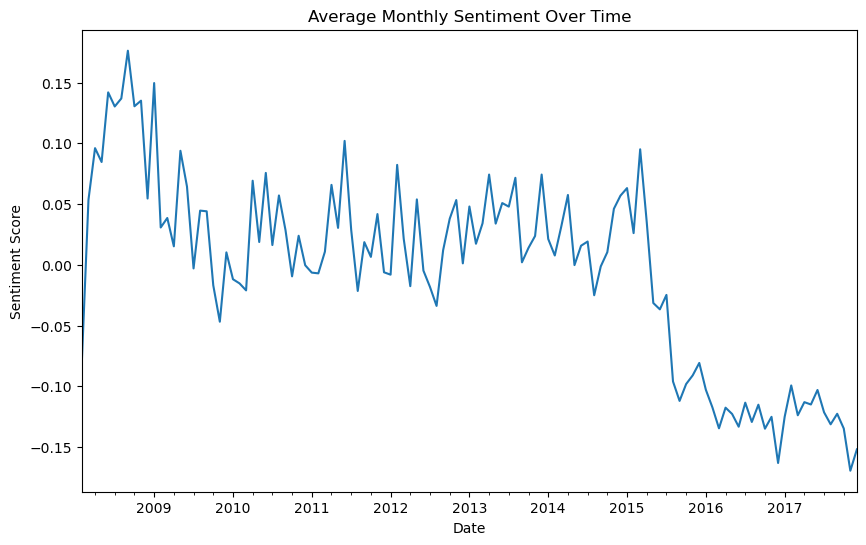

In [119]:

# Visualization
plt.figure(figsize=(10, 6))
monthly_sentiment.plot()
plt.title('Average Monthly Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.show()

In [123]:
# Calculate average monthly sentiment
monthly_sentiment = patient_reviews.groupby(pd.Grouper(key='date', freq='M'))['sentiment'].mean()

# Display average monthly sentiment as text
for date, sentiment in monthly_sentiment.items():
    print(f"Date: {date.strftime('%Y-%m')}, Average Sentiment Score: {sentiment:.2f}")


Date: 2008-02, Average Sentiment Score: -0.08
Date: 2008-03, Average Sentiment Score: 0.05
Date: 2008-04, Average Sentiment Score: 0.10
Date: 2008-05, Average Sentiment Score: 0.08
Date: 2008-06, Average Sentiment Score: 0.14
Date: 2008-07, Average Sentiment Score: 0.13
Date: 2008-08, Average Sentiment Score: 0.14
Date: 2008-09, Average Sentiment Score: 0.18
Date: 2008-10, Average Sentiment Score: 0.13
Date: 2008-11, Average Sentiment Score: 0.14
Date: 2008-12, Average Sentiment Score: 0.05
Date: 2009-01, Average Sentiment Score: 0.15
Date: 2009-02, Average Sentiment Score: 0.03
Date: 2009-03, Average Sentiment Score: 0.04
Date: 2009-04, Average Sentiment Score: 0.02
Date: 2009-05, Average Sentiment Score: 0.09
Date: 2009-06, Average Sentiment Score: 0.06
Date: 2009-07, Average Sentiment Score: -0.00
Date: 2009-08, Average Sentiment Score: 0.04
Date: 2009-09, Average Sentiment Score: 0.04
Date: 2009-10, Average Sentiment Score: -0.02
Date: 2009-11, Average Sentiment Score: -0.05
Date: 

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Assuming patient_reviews is your DataFrame with date and review volume
# Adjust the code according to your actual DataFrame structure



In [132]:
# Convert date column to datetime format
patient_reviews['date'] = pd.to_datetime(patient_reviews['date'])



In [133]:
# Group by date and calculate the total review count for each month
monthly_review_count = patient_reviews.groupby(pd.Grouper(key='date', freq='M')).size()



In [134]:
# Split data into train and test sets
train_data = monthly_review_count.iloc[:len(monthly_review_count)-12]
test_data = monthly_review_count.iloc[len(monthly_review_count)-12:]



In [128]:
# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))
fitted_model = model.fit()



In [135]:


# Assuming patient_reviews is your DataFrame with date and review volume
# Adjust the code according to your actual DataFrame structure

# Convert date column to datetime format
patient_reviews['date'] = pd.to_datetime(patient_reviews['date'])

# Group by date and calculate the total review count for each month
monthly_review_count = patient_reviews.groupby(pd.Grouper(key='date', freq='M')).size()

# Split data into train and test sets
train_data = monthly_review_count.iloc[:len(monthly_review_count)-12]
test_data = monthly_review_count.iloc[len(monthly_review_count)-12:]

# Fit ARIMA model
model = ARIMA(train_data, order=(5,1,0))
fitted_model = model.fit()

# Forecast future review volume
forecast = fitted_model.forecast(steps=len(test_data))




In [136]:
# Calculate RMSE
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('Forecasting Monthly Review Volume using ARIMA')
plt.xlabel('Date')
plt.ylabel('Review Volume')
plt.legend()
plt.show()


Root Mean Squared Error (RMSE): 769.7921616374236


In [137]:
# Forecast future review volume
forecast = fitted_model.forecast(steps=len(test_data))

# Output the forecasted values as text
for i, val in enumerate(forecast):
    print(f"Forecast for {test_data.index[i].strftime('%Y-%m')}: {val}")


Forecast for 2017-01: 2750.8244406487584
Forecast for 2017-02: 2710.9904132770725
Forecast for 2017-03: 2727.1311074559353
Forecast for 2017-04: 2736.071287377065
Forecast for 2017-05: 2728.280703502174
Forecast for 2017-06: 2723.325293360206
Forecast for 2017-07: 2723.4074463860507
Forecast for 2017-08: 2725.266555132088
Forecast for 2017-09: 2724.5539033383275
Forecast for 2017-10: 2723.2120079906936
Forecast for 2017-11: 2723.238990868764
Forecast for 2017-12: 2723.451313860387


In [141]:
print(type(data))


<class 'pandas.core.frame.DataFrame'>


In [142]:
print(data.shape)


(161297, 7)


In [143]:
print(data.head())


   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  


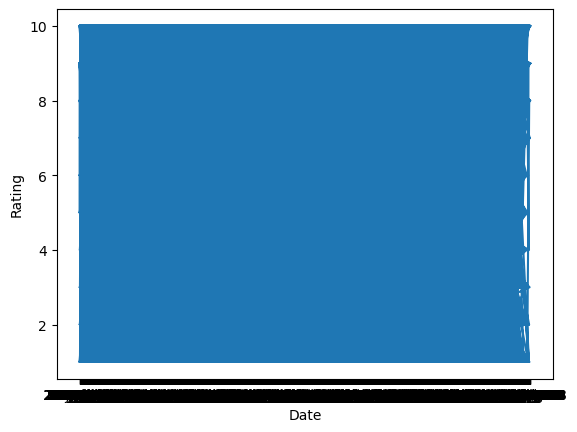

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Visualize the time series data (assuming 'rating' is the column you want to plot)
plt.plot(data['date'], data['rating'])
plt.xlabel('Date')
plt.ylabel('Rating')
plt.show()


In [150]:
# Read the data
data = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Display the first few rows of the dataframe
print(data[['date', 'rating']].head())


        date  rating
0  20-May-12       9
1  27-Apr-10       8
2  14-Dec-09       5
3   3-Nov-15       8
4  27-Nov-16       9


In [152]:
# Selection of Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Inferential Models
linear_regression = LinearRegression()
logistic_regression = LogisticRegression()
random_forest_regressor = RandomForestRegressor()
random_forest_classifier = RandomForestClassifier()
svr = SVR()
decision_tree_classifier = DecisionTreeClassifier()

# Machine Learning Models
kmeans = KMeans()
agglomerative_clustering = AgglomerativeClustering()

# ARIMA requires endogenous variable (time series data) as input
# Example usage: ARIMA(endog=data, order=(p, d, q))
arima = ARIMA(endog=data['rating'], order=(1, 1, 1))

# Define X_train
X_train = data[['drugName', 'condition', 'review', 'usefulCount']]

# LSTM model
lstm = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=1)
])


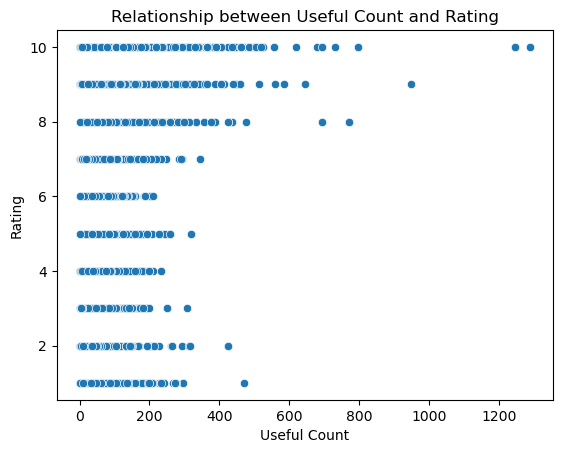

                                  drugName  \
0                A + D Cracked Skin Relief   
1                               A / B Otic   
2     Abacavir / dolutegravir / lamivudine   
3       Abacavir / lamivudine / zidovudine   
4                                Abatacept   
...                                    ...   
8485                 depo-subQ provera 104   
8486                                  ella   
8487                                femhrt   
8488                                femhrt   
8489                                femhrt   

                                       condition  count  
0                       Bacterial Skin Infection      1  
1                                   Otitis Media      1  
2                                  HIV Infection     52  
3                                  HIV Infection      1  
4                  Juvenile Idiopathic Arthritis      2  
...                                          ...    ...  
8485                               Birth 

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame containing the analyzed relationships

# Plotting relationships using Seaborn
# Example: Relationship between 'usefulCount' and 'rating'
sns.scatterplot(x='usefulCount', y='rating', data=data)
plt.title('Relationship between Useful Count and Rating')
plt.xlabel('Useful Count')
plt.ylabel('Rating')
plt.show()

# Creating tables using Pandas
# Example: Relationship between 'drugName' and 'condition'
relationship_table = data.groupby(['drugName', 'condition']).size().reset_index(name='count')
print(relationship_table)


In [154]:
import pandas as pd

# Assuming the results are stored in a CSV file named 'results.csv'
# You can replace 'results.csv' with the actual file path if needed
df = pd.read_csv(r"C:\Users\Pc\Downloads\drugsComTrain_raw.csv(1)\drugsComTrain_raw.csv")

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Get basic statistics of the 'count' column
print(df['count'].describe())

# Find the most common drug-condition combinations
most_common = df.loc[df['count'].idxmax()]
print("Most common drug-condition combination:")
print(most_common)

# Find the unique drug names and conditions
unique_drugs = df['drugName'].unique()
unique_conditions = df['condition'].unique()
print("Unique drugs:", len(unique_drugs))
print("Unique conditions:", len(unique_conditions))


   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  


KeyError: 'count'

In [155]:
import pandas as pd

# Assuming the results are stored in a DataFrame named 'df'
# Display the first few rows of the DataFrame to understand its structure
print(df.head())

# Get basic statistics of the 'usefulCount' column
print(df['usefulCount'].describe())

# Find the most common drug-condition combinations
most_common = df.loc[df['usefulCount'].idxmax()]
print("Most common drug-condition combination:")
print(most_common)

# Find the unique drug names and conditions
unique_drugs = df['drugName'].unique()
unique_conditions = df['condition'].unique()
print("Unique drugs:", len(unique_drugs))
print("Unique conditions:", len(unique_conditions))


   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  
count    161297.0000